# Entanglement

Entanglement is a strange quantum phenomenon where two qubits interact in such a way that they become entangled.

This means that the state of one qubit is dependent on the state of another qubit.

If we entangle two qubits in superposition, we can entangle them so that they're measurements are always the same or so that they anti-correlated meaning their measured states will always be the opposite of each other. 

We still won't know what the final state of each of the qubits will be, but we do know the relationship between them.

When the observed states of qubits become dependent on each other, we can longer describe their states individually, like we have done thus far in these notebooks. 

For a quantum computer to be faster than it's classical counterpart it must use entanglement. 

Without entanglement, there is no quantum advantage. 

$
(H \otimes I)\ket{00}
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
1&0&1&0\cr
0&1&0&1\cr
1&0&-1&0\cr
0&1&0&-1\cr
\end{bmatrix}
\begin{bmatrix}
1\cr 0\cr 0\cr 0
\end{bmatrix}
=\frac{1}{\sqrt{2}}
\begin{bmatrix}
1\cr 0\cr 1\cr 0
\end{bmatrix}
=\ket{+0}
$

$
P(\ket{+0} = \ket{00}) = \frac{1}{2}
$
<br>
<br>
$
P(\ket{+0} = \ket{01}) = 0
$
<br>
<br>
$
P(\ket{+0} = \ket{10}) = \frac{1}{2}
$
<br>
<br>
$
P(\ket{+0} = \ket{11}) = 0
$

There is no relationship in this quantum state, the first qubit will always collapse to 0 and the second has a 50%/50% chance of going to 1 or 0.

$
CNOT\ket{+0}
=\frac{1}{\sqrt{2}}
\begin{bmatrix}
1&0&0&0\cr
0&1&0&0\cr
0&0&0&1\cr
0&0&1&0\cr
\end{bmatrix}
\begin{bmatrix}
1\cr 0\cr 1\cr 0
\end{bmatrix}
=\frac{1}{\sqrt{2}}
\begin{bmatrix}
1\cr 0\cr 0\cr 1\cr
\end{bmatrix}
$

$
P(CNOT\ket{+0} = \ket{00}) = \frac{1}{2}
$
<br>
<br>
$
P(CNOT\ket{+0} = \ket{01}) = 0
$
<br>
<br>
$
P(CNOT\ket{+0} = \ket{10}) = 0
$
<br>
<br>
$
P(CNOT\ket{+0} = \ket{11}) = \frac{1}{2}
$

Now when we measure one of the qubits, we will immediately know what the outcome of the other qubit is because they are correlated to always be the same. 

## Bell States

The Bell states are four maximally entangled quantum states of two qubits.

There are two states $\ket{\Phi^+}$ and $\ket{\Phi^-}$ where the states of the two qubits are correlated to always be the same.
<br>
<br>
$
\ket{\Phi^+} = \frac{\ket{00}+\ket{11}}{\sqrt{2}}
$
<br>
<br>
$
\ket{\Phi^-} = \frac{\ket{00}-\ket{11}}{\sqrt{2}}
$

And there are two states $\ket{\Psi^+}$ and $\ket{\Psi^-}$ where the states of the two qubits are correlated to always be opposite.
<br>
<br>
$
\ket{\Psi^+} = \frac{\ket{01}+\ket{10}}{\sqrt{2}}
$
<br>
<br>
$
\ket{\Psi^-} = \frac{\ket{01}-\ket{10}}{\sqrt{2}}
$

These states form the Bell basis for a two qubit system. 

## $\ket{\Phi^+}$ in Qiskit

In [361]:
from qiskit import * 
from qiskit_aer import *
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
%matplotlib inline

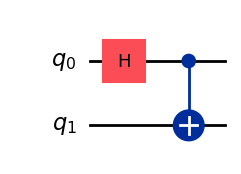

In [362]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw(output='mpl');

In [363]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector} =")

<IPython.core.display.Latex object>

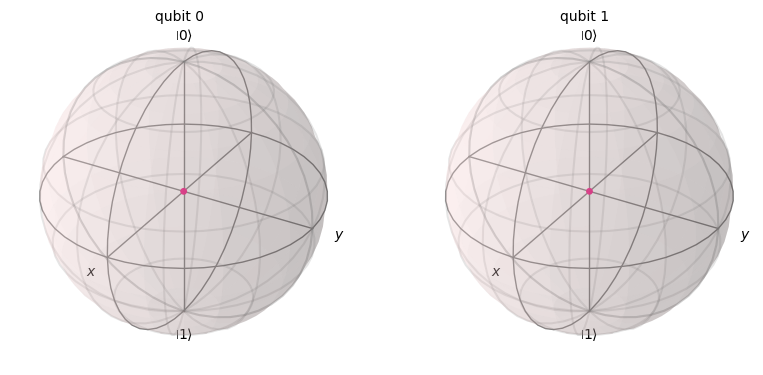

In [364]:
plot_bloch_multivector(statevector);

{'11': 518, '00': 506}


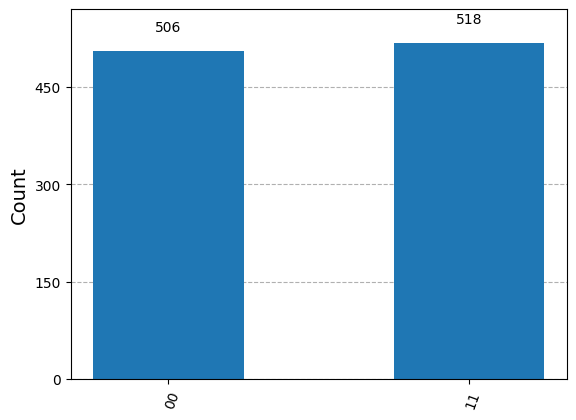

In [365]:
circuit.measure_all()
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts())
print(sim_result.get_counts())

Now our qubits are entangled so that they both collapse to $\ket{0}$ or to $\ket{1}$

An important note is that the order of the gates here matter. Let's reverse them and see the output.

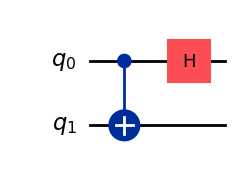

In [366]:
circuit = QuantumCircuit(2)
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output='mpl');

In [367]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector} =")

<IPython.core.display.Latex object>

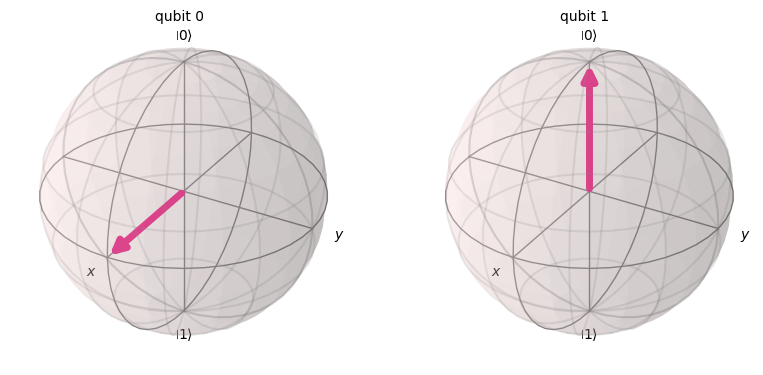

In [368]:
plot_bloch_multivector(statevector);

{'00': 529, '01': 495}


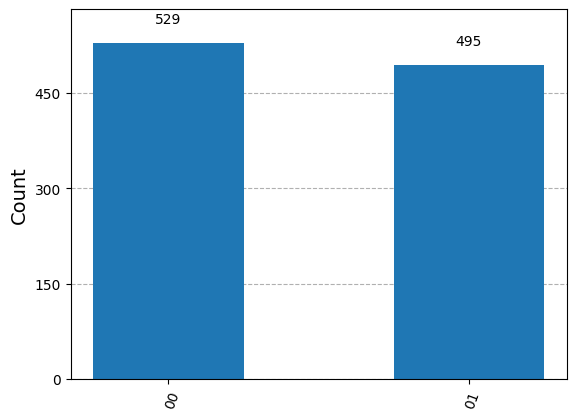

In [369]:
circuit.measure_all()
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts())
print(sim_result.get_counts())

While the first qubit is in a state of superposition, the two qubits are not entangled because the second qubit will always be in $\ket{0}$

## $\ket{\Psi^+}$ in Qiskit

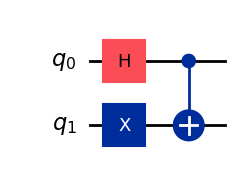

In [370]:
circuit = QuantumCircuit(2)
circuit.x(1)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw(output='mpl');

In [371]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector} =")

<IPython.core.display.Latex object>

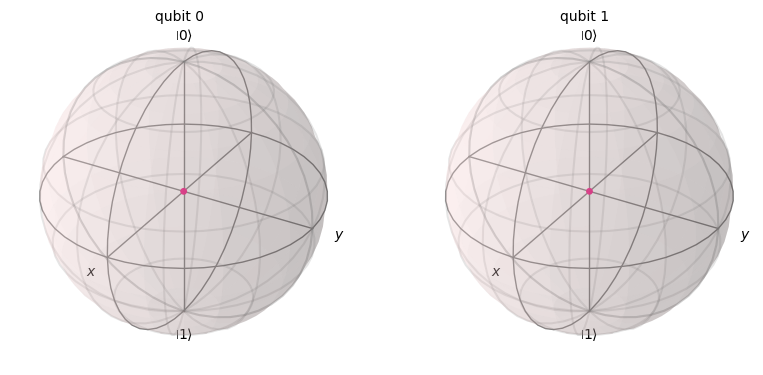

In [372]:
plot_bloch_multivector(statevector);

{'01': 524, '10': 500}


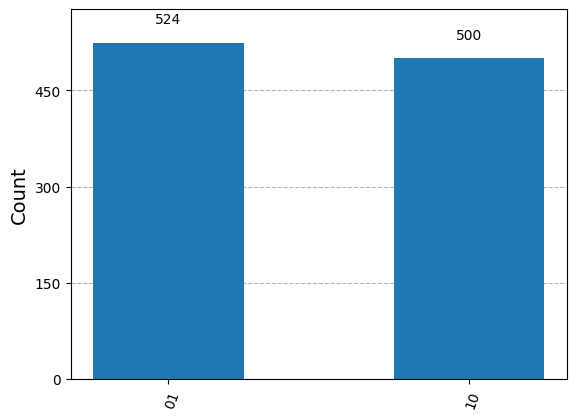

In [373]:
circuit.measure_all()
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts())
print(sim_result.get_counts())

Now we have entangled our qubits to have anti-correlated outcome!

## Experimentation
Try to create entanglement using other gates!

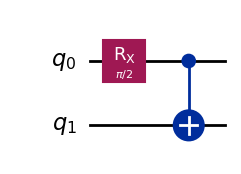

In [374]:
circuit = QuantumCircuit(2)
circuit.rx(pi/2, 0)
circuit.cx(0, 1)
circuit.draw(output='mpl');

In [375]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector} =")

<IPython.core.display.Latex object>

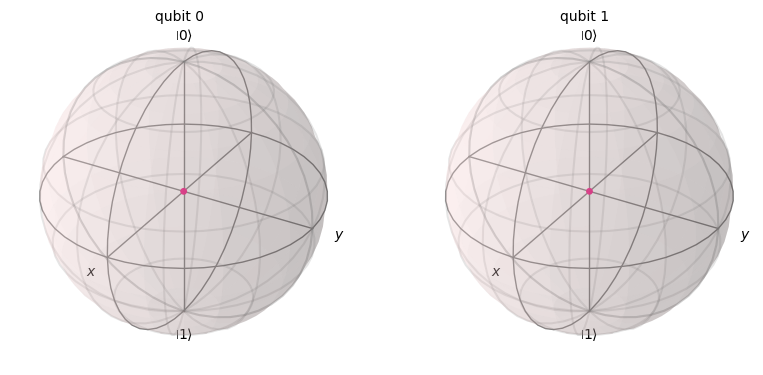

In [376]:
plot_bloch_multivector(statevector);

{'00': 494, '11': 530}


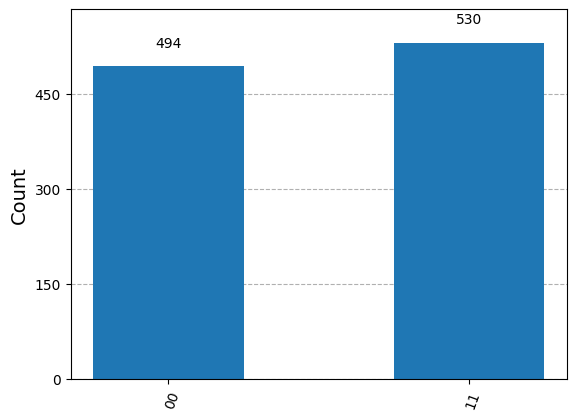

In [377]:
circuit.measure_all()
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts())
print(sim_result.get_counts())

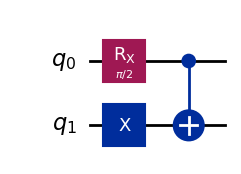

In [378]:
circuit = QuantumCircuit(2)
circuit.rx(pi/2, 0)
circuit.x(1)
circuit.cx(0, 1)
circuit.draw(output='mpl');

In [379]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector} =")

<IPython.core.display.Latex object>

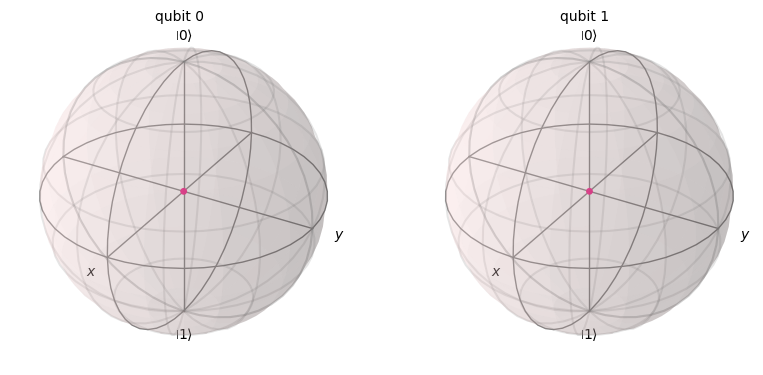

In [380]:
plot_bloch_multivector(statevector);

{'10': 501, '01': 523}


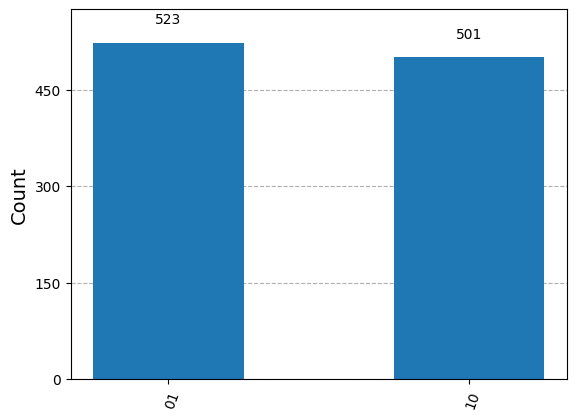

In [381]:
circuit.measure_all()
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts())
print(sim_result.get_counts())

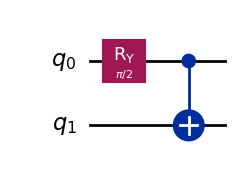

In [382]:
circuit = QuantumCircuit(2)
circuit.ry(pi/2, 0)
circuit.cx(0, 1)
circuit.draw(output='mpl');

In [383]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector} =")

<IPython.core.display.Latex object>

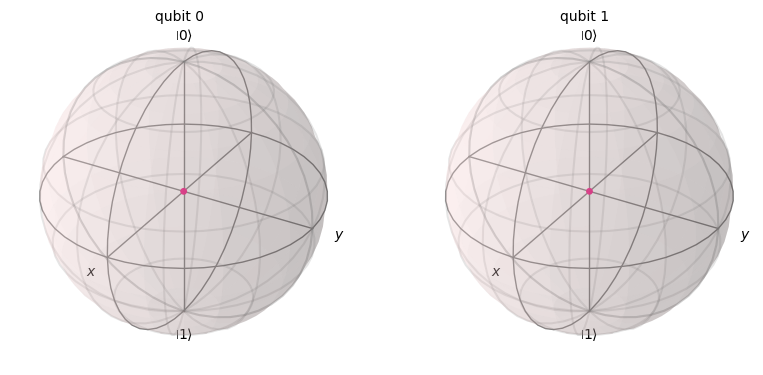

In [384]:
plot_bloch_multivector(statevector);

{'11': 515, '00': 509}


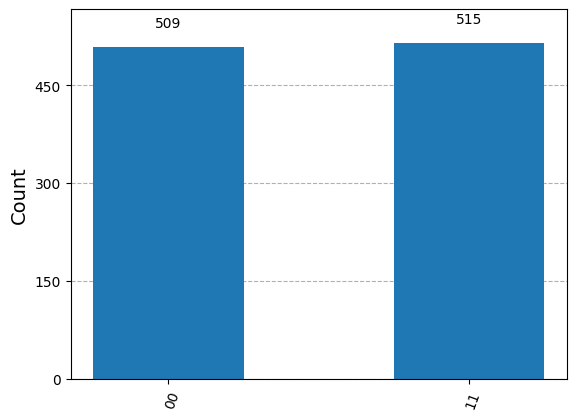

In [385]:
circuit.measure_all()
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts())
print(sim_result.get_counts())

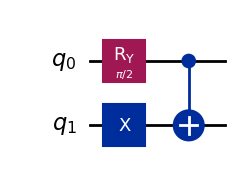

In [386]:
circuit = QuantumCircuit(2)
circuit.ry(pi/2, 0)
circuit.x(1)
circuit.cx(0, 1)
circuit.draw(output='mpl');

In [387]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector} =")

<IPython.core.display.Latex object>

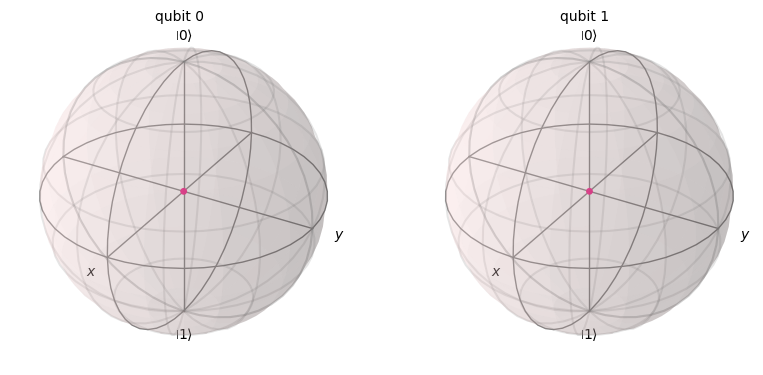

In [388]:
plot_bloch_multivector(statevector);

{'01': 525, '10': 499}


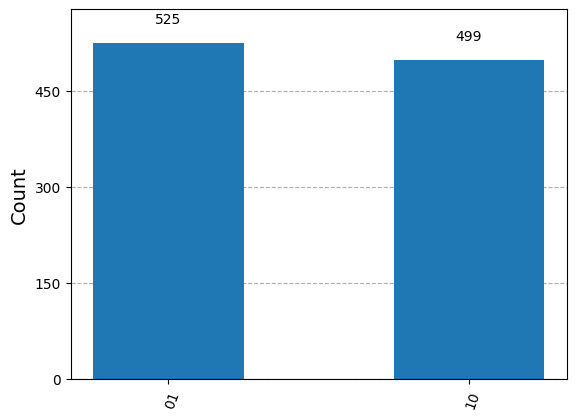

In [389]:
circuit.measure_all()
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts())
print(sim_result.get_counts())